# Inferencia
Hablamos de inferencia estadística cuando queremos obtener **información de una población mediante una pequeña submuestra**. En la estadísitca descriptiva nos quedábamos con unos pocos valores, pero lo ideal sería saber la distribución de una población. Una vez sabemos la distribución podemos calcular la probabilidad de que un valor pertenezca o no a dicha población, lo que nos permite hacer ciertas predicciones, como por ejemplo si un valor pertenece o no a este misma población. 


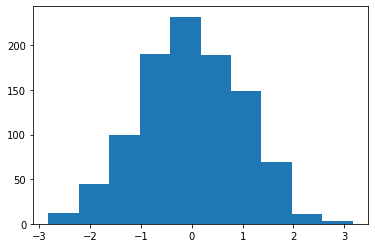

In [4]:
import numpy as np
import matplotlib.pyplot as pl
pl.hist(np.random.normal(0,1, 1000));

## 1. Funciones de distribución
La **función de distribución**, F(x), se define como:
$F(x)=P(X\leq x), x\in R$

Es decir F(x) nos da la probabilidad de que X tome un valor igual o inferior a x. Y nos permite decir la probabilidad de que unos **datos pertenezcan a una distribución**. Propiedades:

* No decreciente

* 0 < F(x) < 1

* $P(x_1 \lt X \leq x_2)=F(x_2)−F(x_2)$

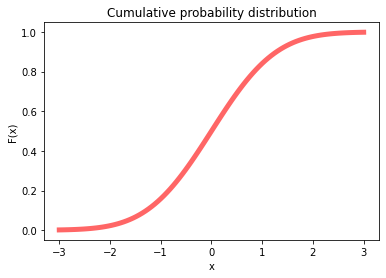

In [31]:
# usarmeos paquete scipy.stats
from scipy.stats import norm
x = np.linspace(-3, 3, 100)
pl.plot(x, norm.cdf(x), 'r-', lw=5, alpha=0.6, label='cdf')
pl.xlabel('x')
pl.ylabel('F(x)')
pl.title('Cumulative probability distribution');

## 2. Función de densidad de probabilidad  
Cuando miramos la distribución de unos datos con un histograma (normalizado) estamos viendo la función de densidad de probabilidad o pdf con la que es la derivada de la función de distribución:

$p(x) = \frac{dF(x)}{dx}$

* No es una probabilidad y f(x) puede ser > 1. 
* Las probabilidades se pueden seguir calculando usando el area debajo de la p(x). 
* El área total debajo la pdf es igual a 1. 



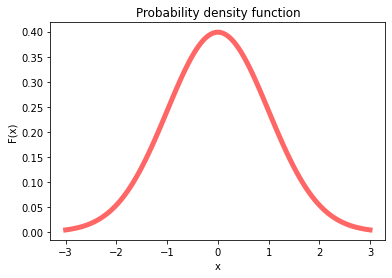

In [29]:
pl.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='cdf')
pl.xlabel('x')
pl.ylabel('F(x)')
pl.title('Probability density function');

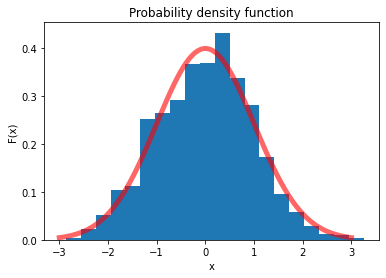

In [30]:
pl.hist(np.random.normal(0, 1, 1000), bins = 20, density = True); # histograma con area = 1
pl.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='cdf')
pl.xlabel('x')
pl.ylabel('F(x)')
pl.title('Probability density function');

Cuantos más puntos tengamos, más se parecerá. Si ponemos más bins en el plot del histograma lo haremos más *smooth* también. Vemos si tenemos 100000 puntos vemos que sigue perfectamente la pdf:

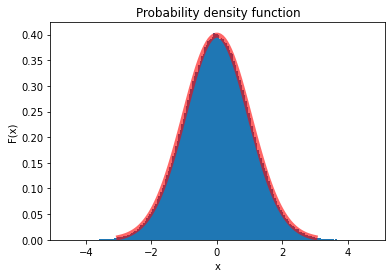

In [28]:
pl.hist(np.random.normal(0, 1, 1000000), bins = 200, density = True);
pl.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='cdf')
pl.xlabel('x')
pl.ylabel('F(x)')
pl.title('Probability density function');

Lo que intenaremos hacer es encontrar la distribución de nuestros datos de tal manera que nos sea simple estimar probabilidades.


Siempre podemos calcular P(X<x) con los datos  

P(X<x) = (Valores < x) / Total Valores.  

Pero solo es fiable si tenemos una gran cantidad. Tener la ditribución teórica nos permite una mejor caracterización de la población. Vemos ejemplo: 

Calculamos la probabilidad de F(-2) con los datos y con la función:

Con una muestra de 100 datos F(-2) = 0.030
valor teórica cdf = 0.023
Con una muestra de 1000 datos F(-2) = 0.028
valor teórica cdf = 0.023
Con una muestra de 1000000 datos F(-2) = 0.023
valor teórica cdf = 0.023


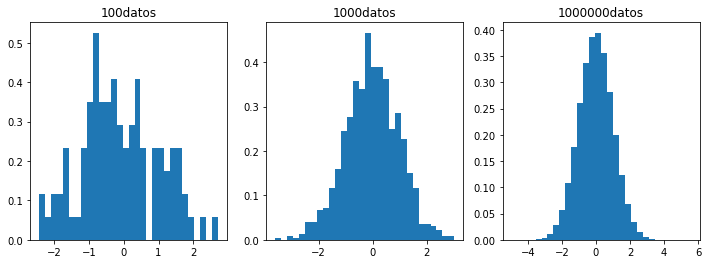

In [45]:
ndat = [100, 1000, 1000000]

pl.figure(figsize = (12,4))
for i,n in enumerate(ndat):
    datos = np.random.normal(0, 1, n)
    print('Con una muestra de ' + str(n) + ' datos F(-2) = {:.3f}'.format(len(datos[datos<-2])/n))
    pl.subplot(1, 3, i+1)
    pl.hist(datos, density = True, bins = 30)
    pl.title(str(n) + 'datos')
    print('valor teórica cdf = {:.3f}'.format(norm.cdf(-2)))

Vemos que con 100 datos es más dificil sacar una buena estimación de F(-2) porque hay pocos datos

## 3. Distribuciones
Vemos aquí las más típicas: uniforme, normal, possion y binomial. Para los modelos teóricos usaremos el paquete `scipy`.

### Distribución uniforme:

Los valores se distribuyen uniformemente, se caracteriza por el valor máximo y el mínimo, y todos se comportan igual. Dentro de este rango todos tienen pdf = 1, y fuera pdf = 0

(array([0.93236504, 1.31333141, 1.02259392, 0.86218703, 0.93236504,
        1.19302624, 0.95241591, 1.03261935, 0.96244134, 0.82208531]),
 array([7.22007499e-04, 1.00468347e-01, 2.00214686e-01, 2.99961025e-01,
        3.99707364e-01, 4.99453703e-01, 5.99200043e-01, 6.98946382e-01,
        7.98692721e-01, 8.98439060e-01, 9.98185399e-01]),
 <BarContainer object of 10 artists>)

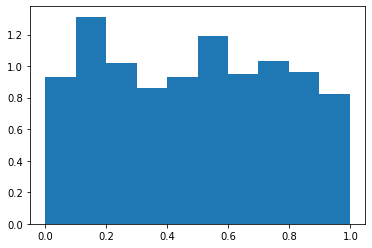

In [46]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import uniform

pl.hist(np.random.uniform(0,1,1000),density= True)

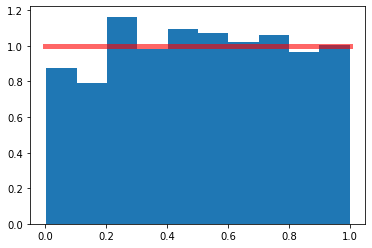

In [98]:
pl.hist(np.random.uniform(0,1,1000),density= True)

# lanzamos valores del mismo rango que vemos en el histograma
x = np.linspace(0, 1, 100)
pl.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
# generamos ahora la distribución teórica



In [99]:
# Con las teóricas podemos encontrar que función
# de probabilidad tiene un valor
uniform.cdf(0.2)

0.2

In [100]:
# también qué valores tienen una función de probabilidad dada
uniform.ppf(0.4)

0.4

In [101]:
uniform.pdf(10)

0.0

In [102]:
uniform.pdf(0.5)

1.0

### Distribución Normal
En la naturaleza, por suerte, hay muchas variables que se comportan de una manera Gaussiana o normal. Se caracteriza por la media y la desviación típica.

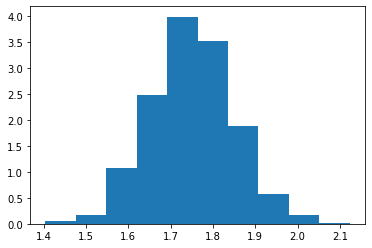

In [24]:
from scipy.stats import norm
norm_dist = np.random.normal(1.75, 0.1, 1000)
pl.hist(norm_dist,density = True);


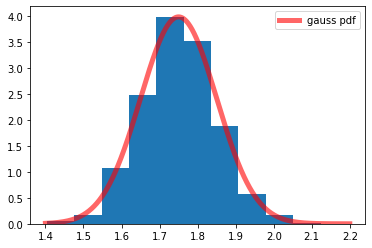

In [25]:
pl.hist(norm_dist,density = True);
# lanzamos valores del mismo rango que vemos en el histograma
x = np.linspace(1.4, 2.2, 1000)
pl.plot(x, norm.pdf(x, 1.75, 0.1), 'r-', lw=5, alpha=0.6, label='gauss pdf');
pl.legend();

Ejemplo: En una población la altura media es 1.75m  y la desviación típica 0.1m  ¿Probabilidad de que una persona de la población mida menos de 1.60m?

In [26]:
# usamos la función de probabilidad cdf, ponemos el valor que queremos evaluar
# y luego la media y la simga. los detalles de cada uno están en 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

norm.cdf(1.6, 1.75, 0.1)

0.06680720126885817

Si quisieramos saber qué altura tendría alguien de esta población que la probabilidad que exista una persona más baja sea 0.01 usamos ppf

In [27]:
norm.ppf(0.01, 1.75, 0.1)

1.5173652125959158

Nos sale alguien que mide 1.5 medio. Si esa población incluyera por ejemplo niños sería más ancha y obtendríamos otro tipo de resultados.

In [28]:
norm.ppf(0.01, 1.75, 0.5)

0.5868260629795796

### Distribución Binomial
La variable aleatoria binomial es la suma de n variables aleatorias discretas. (No pueden tomar cualquier valor). Repetimos n veces un experimento binario con dos posibles resultados cada vez, 1 = éxito y 0 = fracaso, con probabilidades p y 1 − p respectivamente. La variable aleatoria binomial X representa el número total de éxitos obtenidos en los n ensayos independientes. Típica distribucíon de que los resultados de tirar un dado.



(array([0.626, 0.   , 0.85 , 0.   , 0.412, 0.   , 0.104, 0.   , 0.006,
        0.002]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

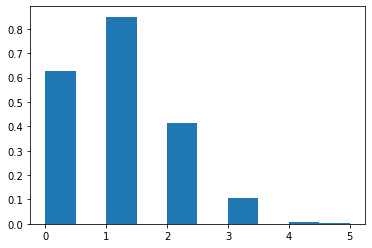

In [29]:
from scipy.stats import binom

bin_dist = np.random.binomial(5, 0.2, 1000)
pl.hist(bin_dist,density = True)


- Ejemplo: Lanzamos 5 veces una moneda. ¿Probabilidad de sacar 4 caras?

In [30]:

x = 4
n = 5
p = 0.5

binom.pmf(x, n, p)  # en vez de pdf usamos probabilidad mass function porque es una variable discreta

0.15625

- Lanzamos 5 veces una moneda. ¿Probabilidad de sacar 4 caras o menos?

In [31]:
binom.cdf(x, n, p)

0.96875

### Distribución de Poisson
La distribución de Possion también aparece en variables discretas, expresa la probabilidad de que un determinado número de eventos ocurra en un intérvalo de tiempo. 



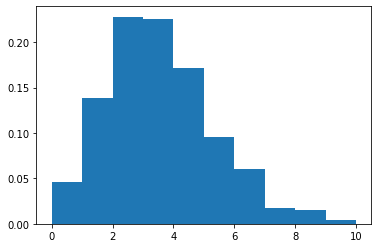

In [32]:
from scipy.stats import poisson


poisson_dist = np.random.poisson(3, 1000)
pl.hist(poisson_dist,density = True);

- Ejemplo: El número medio de accidentes por año un una carretera es 3. ¿Probabilidad de que haya 7 el próximo año?


In [33]:

lmbd = 3
x = 7
poisson.pmf(x,lmbd)

0.02160403145248382

- ¿Probabilidad de que haya 7 o menos el próximo año?

In [34]:
poisson.cdf(x,lmbd)

0.9880954961436426

Hay algunos tests que nos permiten saber si nuestros datos pertenecen a una distribución. Pero primero tenemos que hacer una suposición sobre dicha distribución. Para eso siempre tenemos en cuenta la naturaleza de la variables y su visualización. 

## 3. Ejercicios para practicar
1. En el archivo GOT.txt figura el número de muertes por cada uno de los 55 primeros capítulos de la serie Juego de Tronos.

* Razona qué distribución usarías para calcular probabilidades asociadas a esta variable.
* Estima la probabilidad de que en el siguiente capítulo haya más de 5 muertes. Explica qué suposiciones has hecho.

In [35]:
# Código

2. Lee el archivo data/sample0.txt. Visualiza el histograma, deduce de qué distribución se trata, usa esa función para encontrar los valores caracterísitcos de la distribución " a mano". Usando las funciones de `scipy.stats` puedes ir probando valores y haciendo el gráfico encima del histograma para ver cual es el que mejor se ajusta. Haz 3 o 4 plots de la función encima del histograma a la vez para ver la diferencia. Recuerda usar el histograma con density = True. Pon la leyenda para que se entienda el plot.  

2.1 Haz lo mismo para data/sample1.txt. 


2.2 ¿Podrían pertenecer a la misma distribución? Razónalo.

Puedes usar también el test de Kolmogorov-Smirnov https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

In [63]:
# Código

